In [1]:
import torch
from FPenv import FPEnv

# Recreate training env
env = FPEnv(fp_path="Floorplans/RL/Ocala/floorplan.json")

# Load Trained Models
model = torch.load('Models/TrainOnOcola.pth')

/home/timo/projects/primevision/res-pvt-ai4spp/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Real Floorplan Path Finding with Reinforcement Learning and Astar Search

Actions Sizes: torch.Size([14])
Actions indices: tensor([ 96,  27,  26,  25,  24, 113, 131, 130, 129, 128, 109,  28,  29,  30])
Actions Sizes: torch.Size([15])
Actions indices: tensor([114,  96,  27,  26,  25,  24, 113, 131, 130, 129, 128, 109,  28,  29,
         30])
Actions Sizes: torch.Size([32])
Actions indices: tensor([135, 134, 122, 103,  36,  37,  38,  39,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  27,  26,  25,  24, 113, 131, 130, 129, 128, 109,
         28,  29,  30,  31])
Actions Sizes: torch.Size([15])
Actions indices: tensor([116, 135, 134, 122, 103, 104, 105, 106, 107, 108, 109,  28,  29,  30,
         31])
Actions Sizes: torch.Size([25])
Actions indices: tensor([135, 134, 122, 103,  36,  37,  38,  39,  86,  70,  71,  72,  73,  74,
         75,  76,   4,   5,   6,   7,  60,  61,  62,  63,   3])
Actions Sizes: torch.Size([26])
Actions indices: tensor([116, 135, 134, 122, 103,  36,  37,  38,  39,  86,  70,  12,  13,  14,
         15,  54,  55,  56,  57,  58, 

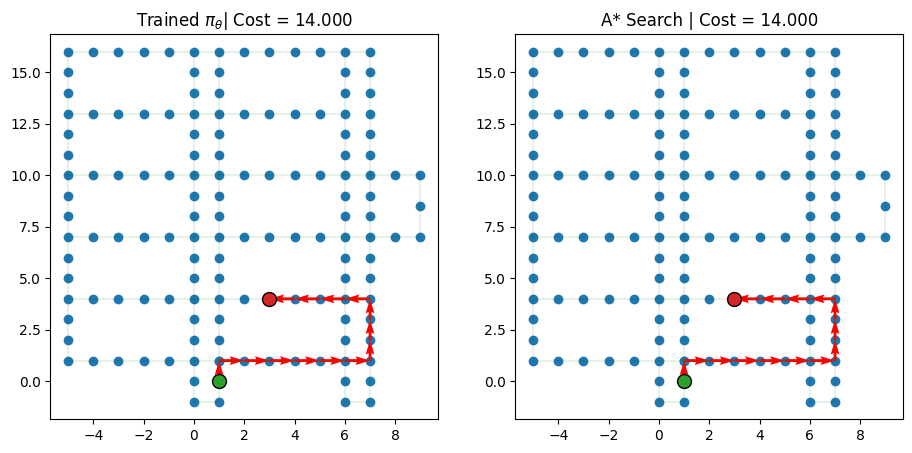

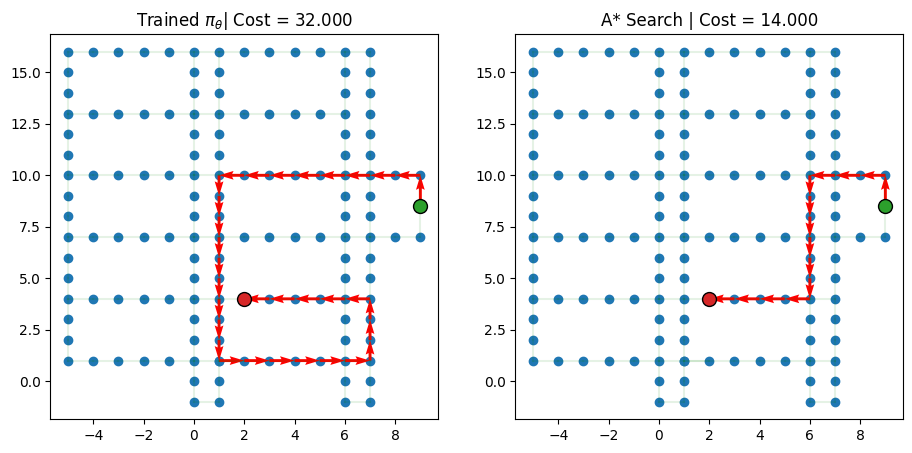

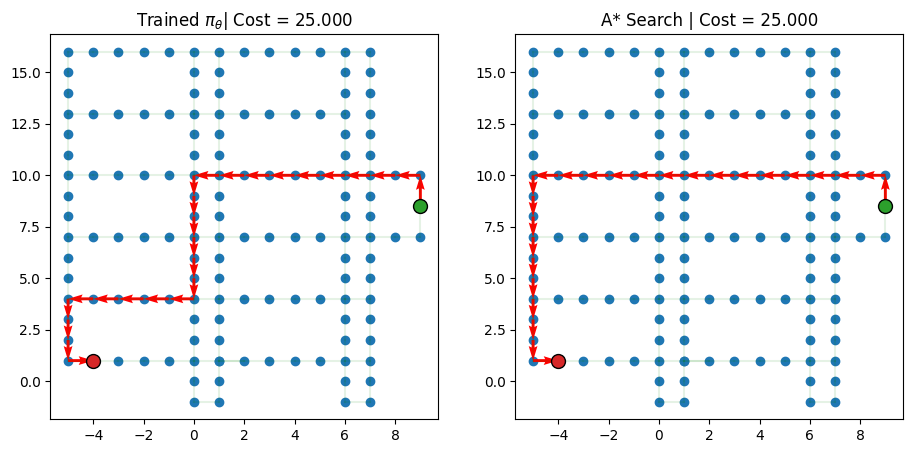

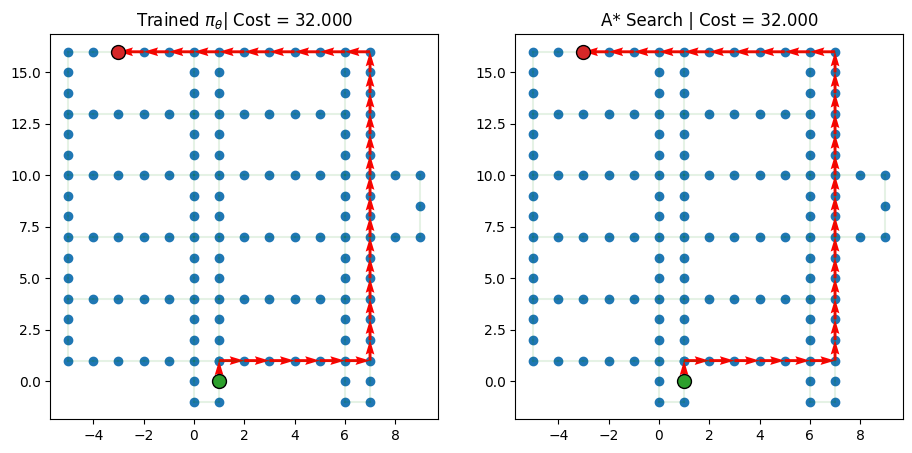

In [3]:
from FPenv import FPEnv
from astar import AStarSearch
import torch

# Setup a device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

infer_env = FPEnv(fp_path="Floorplans/RL/Ocala/floorplan.json")
td_init = infer_env.reset(batch_size=[4]).to(device)

policy = model.policy.to(device)

out = policy(td_init.clone(), infer_env, phase="test", decode_type="greedy", return_actions=True)
actions_trained = out['actions'].cpu().detach()

# run A* search on the environment
astar = AStarSearch(td_init.clone())
astar_out = astar.search()
actions_astar = astar_out["actions"].cpu().detach()

# Plotting
import matplotlib.pyplot as plt
for i, td in enumerate(td_init):
    fig, axs = plt.subplots(1,2, figsize=(11,5))

    infer_env.render(td, actions_trained[i], ax=axs[0])
    axs[0].set_title(r"Trained $\pi_\theta$" + f"| Cost = {-out['reward'][i].item():.3f}")

    infer_env.render(td, actions_astar[i], ax=axs[1])
    axs[1].set_title("A* Search | Cost = {:.3f}".format(-astar_out["reward"][i].item()))

In [11]:
import numpy as np
# Initialize the total costs
total_cost_trained = 0
total_cost_astar = 0
cost_list_trained = np.array([])
cost_list_astar = np.array([])

# Number of runs
num_runs = 100

batch_size = 10

# Initialize the action lists
actions_trained = []
actions_astar = []

# Initialize the TensorDict list
td_list = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

infer_env = FPEnv(fp_path="Floorplans/RL/Ocala/floorplan.json")

for _ in range(num_runs):
    while True:
        try:
            # Initialize the action lists for the current run
            actions_trained_run = []
            actions_astar_run = []

            td_init = infer_env.reset(batch_size=[batch_size]).to(device)

            # Run the trained DRL model
            out = policy(td_init.clone(), infer_env, phase="test", decode_type="greedy", return_actions=True)
            total_cost_trained += out['reward'].sum().item()

            # Run A* search
            astar = AStarSearch(td_init.clone())
            astar_out = astar.search()
            total_cost_astar += astar_out["reward"].sum().item()

            # Store the TensorDict
            td_list.append(td_init)

            # Store the output of the astar and trained model
            actions_trained.append(out["actions"].cpu().detach())
            actions_astar.append(astar_out["actions"].cpu().detach())

            # Store the cost of the trained model and A* search
            cost_list_trained = np.append(cost_list_trained, out["reward"].cpu().detach().numpy())
            cost_list_astar = np.append(cost_list_astar, astar_out["reward"].cpu().detach().numpy())

            break
        except:
            continue

    # Append the action lists for the current run to the overall action list
    # actions_trained.append(actions_trained_run)
    # actions_astar.append(actions_astar_run)

# How many -1000 rewards are there in the trained DRL model
nosols_trained = np.sum(cost_list_trained == -1000)
print(f"Number of unsolved problems in trained DRL model: {nosols_trained}")

# Remove all the -1000 rewards
cost_list_trained_filtered = cost_list_trained[cost_list_trained != -1000]

Unused keyword arguments: num_loc. Please check the documentation for the correct keyword arguments
Unused keyword arguments: num_loc. Please check the documentation for the correct keyword arguments
Unused keyword arguments: num_loc. Please check the documentation for the correct keyword arguments
Unused keyword arguments: num_loc. Please check the documentation for the correct keyword arguments
Unused keyword arguments: num_loc. Please check the documentation for the correct keyword arguments
Unused keyword arguments: num_loc. Please check the documentation for the correct keyword arguments
Unused keyword arguments: num_loc. Please check the documentation for the correct keyword arguments
Unused keyword arguments: num_loc. Please check the documentation for the correct keyword arguments
Unused keyword arguments: num_loc. Please check the documentation for the correct keyword arguments
Unused keyword arguments: num_loc. Please check the documentation for the correct keyword arguments


KeyboardInterrupt: 

In [ ]:
from FPenv import FPEnv
from astar import AStarSearch
from Floorplan_Codes.utils import get_paths
import torch

# Setup a device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

floorplans = get_paths("floorplan.json", "Floorplans/USPS", recursive=True, depth=1)
ids = []
for floorplan in floorplans:
    try:
        infer_env = FPEnv(fp_path=floorplan)
        td_init = infer_env.reset(batch_size=[4]).to(device)


        # Function to check for NaNs in a tensor dictionary
        nan_found = False
        for key, tensor in td_init.items():
            if torch.isnan(tensor).any():
              nan_found = True
              print(f"NaN values found in tensor '{key}'")
        if not nan_found:
            print("No NaN values found in the tensor dictionary.")

        policy = model.policy.to(device)

        out = policy(td_init.clone(), infer_env, phase="test", decode_type="greedy", return_actions=True)
        actions_trained = out['actions'].cpu().detach()

        # run A* search on the environment
        astar = AStarSearch(td_init.clone())
        astar_out = astar.search()
        actions_astar = astar_out["actions"].cpu().detach()

        # Plotting
        import matplotlib.pyplot as plt
        for i, td in enumerate(td_init):
            fig, axs = plt.subplots(1,2, figsize=(11,5))

            parts = floorplan.split('/')
            site = parts[-2]
            fig.suptitle("Floorplan: " + site, fontsize=16)

            infer_env.render(td, actions_trained[i], ax=axs[0])
            axs[0].set_title(r"Trained $\pi_\theta$" + f"| Cost = {-out['reward'][i].item():.3f}")

            infer_env.render(td, actions_astar[i], ax=axs[1])
            axs[1].set_title("A* Search | Cost = {:.3f}".format(-astar_out["reward"][i].item()))
    except Exception as e:
        print(e)
        continue